<a href="https://colab.research.google.com/github/Jdasanja/masers_thesis/blob/main/EDA_4_male_pop_4_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import pandas for reading and displaying local file
import pandas as pd

In [2]:
# Load the dataset from the raw GitHub URL
url = 'https://raw.githubusercontent.com/Jdasanja/masers_thesis/main/processed.cleveland.data'
df = pd.read_csv(url, header=None)

# Add column names (based on standard attribute names for the Cleveland dataset)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'num']

# Add a unique identifier column
df['patient_id'] = range(1, len(df) + 1)

# Set 'patient_id' as the index
df.set_index('patient_id', inplace=True)


# Display first few rows of the uploaded file with headers
print("First few rows of the uploaded file with column headers:")
print(df.head())

First few rows of the uploaded file with column headers:
             age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
patient_id                                                                  
1           63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
2           67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
3           67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
4           37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
5           41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

            oldpeak  slope   ca thal  num  
patient_id                                 
1               2.3    3.0  0.0  6.0    0  
2               1.5    2.0  3.0  3.0    2  
3               2.6    2.0  2.0  7.0    1  
4               3.5    3.0  0.0  3.0    0  
5               1.4    1.0  0.0  3.0    0  


In [3]:
# Create a new dataframe with a new binary column based on the values in 'num'
df_binary_col = df.copy()
df_binary_col['num_binary'] = df_binary_col['num'].apply(lambda x: 1 if x in [1, 2, 3, 4] else 0)

df_binary_col = df_binary_col.drop('num', axis=1)

In [4]:
import numpy as np

## Replace question marks with NaN
df_binary_col.replace('?', np.nan, inplace=True)

## Total count of missing values
df_binary_col.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
## Drop rows with NaN values
df_binary_col.dropna(inplace=True)

## Verify if any null values remain
df_binary_col.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


<h1> Only include Male Pop. </h1>


In [6]:
df_binary_col = df_binary_col[df_binary_col['sex'] == 1]
df_binary_col = df_binary_col.drop(columns=['sex'])

In [7]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
# Drop the unique identifier and the target column from features
X = df_binary_col.drop(columns=['num_binary'])

# Separate the target
y = df_binary_col['num_binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Now, X_train and X_test contain only relevant feature columns
# y_train and y_test contain only the target variable

In [ ]:
# Explore the training set
print("DataFrame.info():")
X_train.info()

print("\nDataFrame.describe():")
print(X_train.describe())


DataFrame.info():
<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 122 to 164
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       76 non-null     float64
 1   cp        76 non-null     float64
 2   trestbps  76 non-null     float64
 3   chol      76 non-null     float64
 4   fbs       76 non-null     float64
 5   restecg   76 non-null     float64
 6   thalach   76 non-null     float64
 7   exang     76 non-null     float64
 8   oldpeak   76 non-null     float64
 9   slope     76 non-null     float64
 10  ca        76 non-null     object 
 11  thal      76 non-null     object 
dtypes: float64(10), object(2)
memory usage: 7.7+ KB

DataFrame.describe():
             age         cp    trestbps        chol        fbs    restecg  \
count  76.000000  76.000000   76.000000   76.000000  76.000000  76.000000   
mean   54.776316   3.118421  134.210526  262.631579   0.118421   1.013158   
std     9.167477   0.908730 

In [9]:
## Basic Descriptive
pd.set_option('display.float_format', lambda x: '%.3f' % x)
X_train.describe().transpose()



,count,mean,std,min,25%,50%,75%,max
age,160.000,53.325,8.785,29.000,46.750,54.000,59.000,70.000
cp,160.000,3.188,1.017,1.000,2.750,4.000,4.000,4.000
trestbps,160.000,129.988,16.269,94.000,120.000,130.000,140.000,178.000
chol,160.000,235.475,42.965,126.000,204.000,233.000,263.250,335.000
fbs,160.000,0.138,0.345,0.000,0.000,0.000,0.000,1.000
restecg,160.000,1.025,1.003,0.000,0.000,2.000,2.000,2.000
thalach,160.000,148.119,23.617,88.000,131.000,150.000,166.000,202.000
exang,160.000,0.375,0.486,0.000,0.000,0.000,1.000,1.000
oldpeak,160.000,1.029,1.122,0.000,0.000,0.800,1.800,5.600
slope,160.000,1.581,0.629,1.000,1.000,2.000,2.000,3.000


In [10]:
X_train.shape

(160, 12)

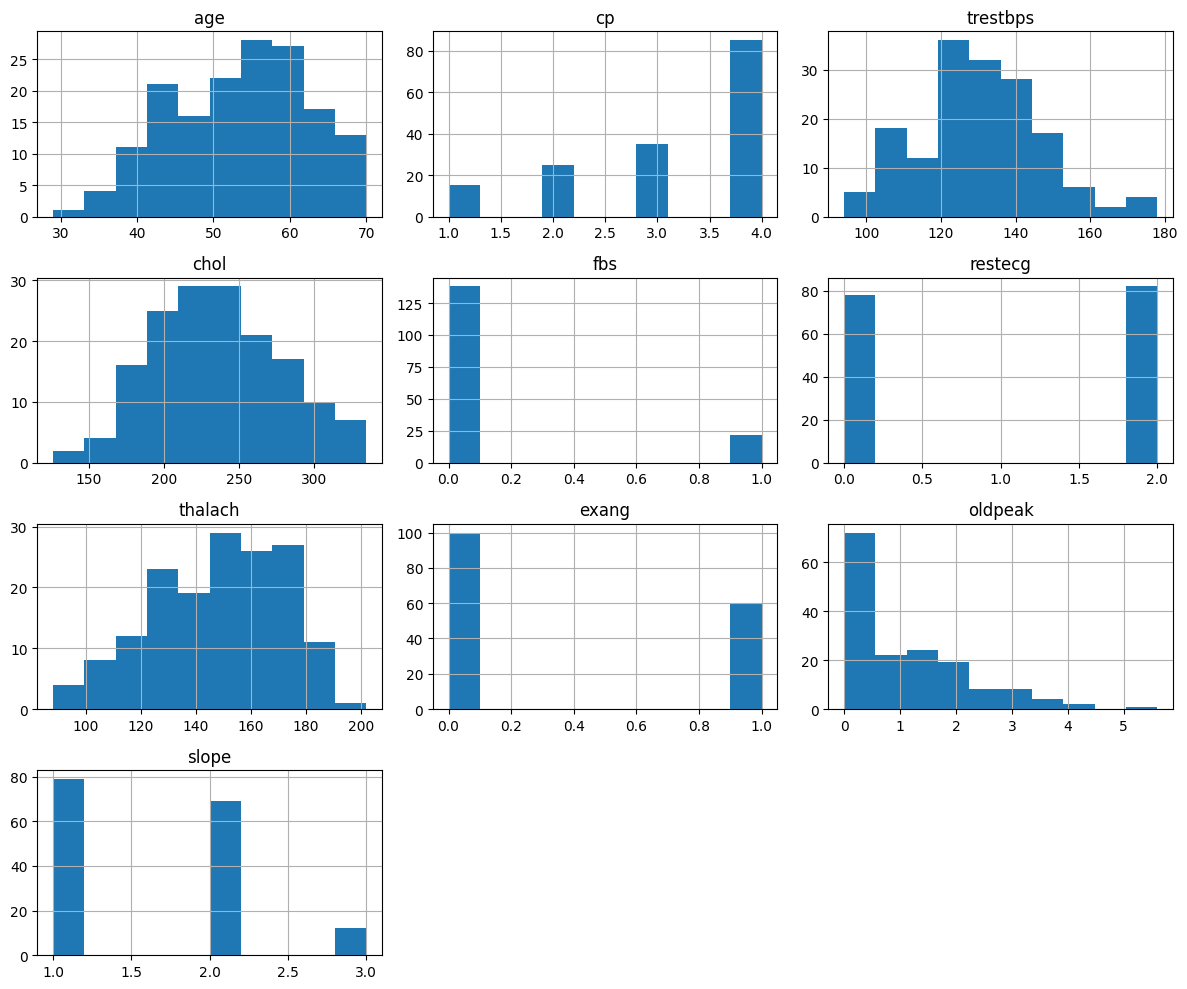

In [11]:
import matplotlib.pyplot as plt

#Histogram
X_train.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

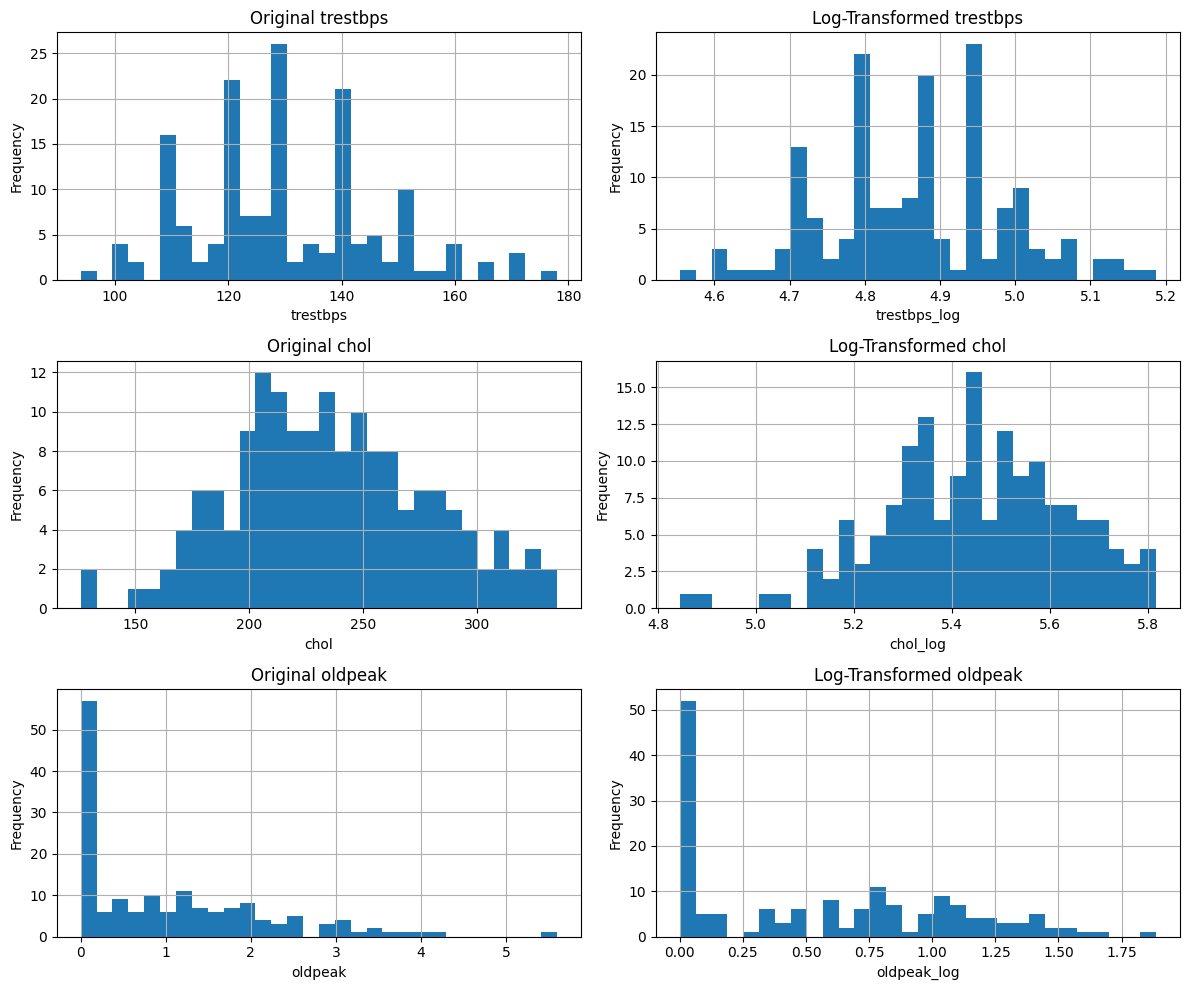

In [12]:
import numpy as np


df_explore = X_train.copy()
# Assuming `df` is the DataFrame with the original data

# Continuous Variables: Apply log transformation
df_explore['trestbps_log'] = np.log(df_explore['trestbps'] + 1)
df_explore['chol_log'] = np.log(df_explore['chol'] + 1)
df_explore['oldpeak_log'] = np.log(df['oldpeak'] + 1)

# Set up a subplot grid for continuous variables
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 3 rows, 2 columns

# Continuous variables to compare
continuous_vars = ['trestbps', 'chol', 'oldpeak']

# Plot continuous variables
for i, var in enumerate(continuous_vars):
    # Original distribution
    df_explore[var].hist(ax=axes[i, 0], bins=30)
    axes[i, 0].set_title(f'Original {var}')
    axes[i, 0].set_xlabel(var)
    axes[i, 0].set_ylabel('Frequency')

    # Log-transformed distribution
    df_explore[f'{var}_log'].hist(ax=axes[i, 1], bins=30)
    axes[i, 1].set_title(f'Log-Transformed {var}')
    axes[i, 1].set_xlabel(f'{var}_log')
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

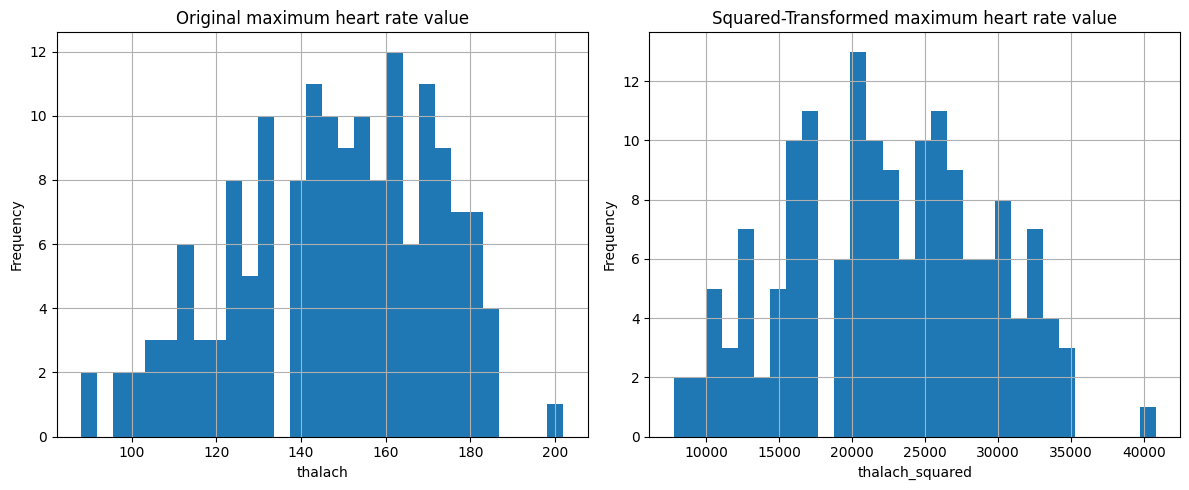

In [13]:
# Calculate and add 'thalach_squared' column to the DataFrame
df_explore['thalach_squared'] = df_explore['thalach'] ** 2  # Squaring the 'thalach' column
# Set up a subplot grid with only two charts (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjusted the grid size and figure size for two plots

# Plotting the original distribution of 'chol' (cholesterol)
df_explore['thalach'].hist(ax=axes[0], bins=30)
axes[0].set_title('Original maximum heart rate value')
axes[0].set_xlabel('thalach')
axes[0].set_ylabel('Frequency')

# Plotting the log-transformed distribution of 'chol'
#df['thalach_log'] = np.log(df['thalach'] + 1)  # Apply log transformation to avoid log(0) issues
df_explore['thalach_squared'].hist(ax=axes[1], bins=30)
axes[1].set_title('Squared-Transformed maximum heart rate value')
axes[1].set_xlabel('thalach_squared')
axes[1].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

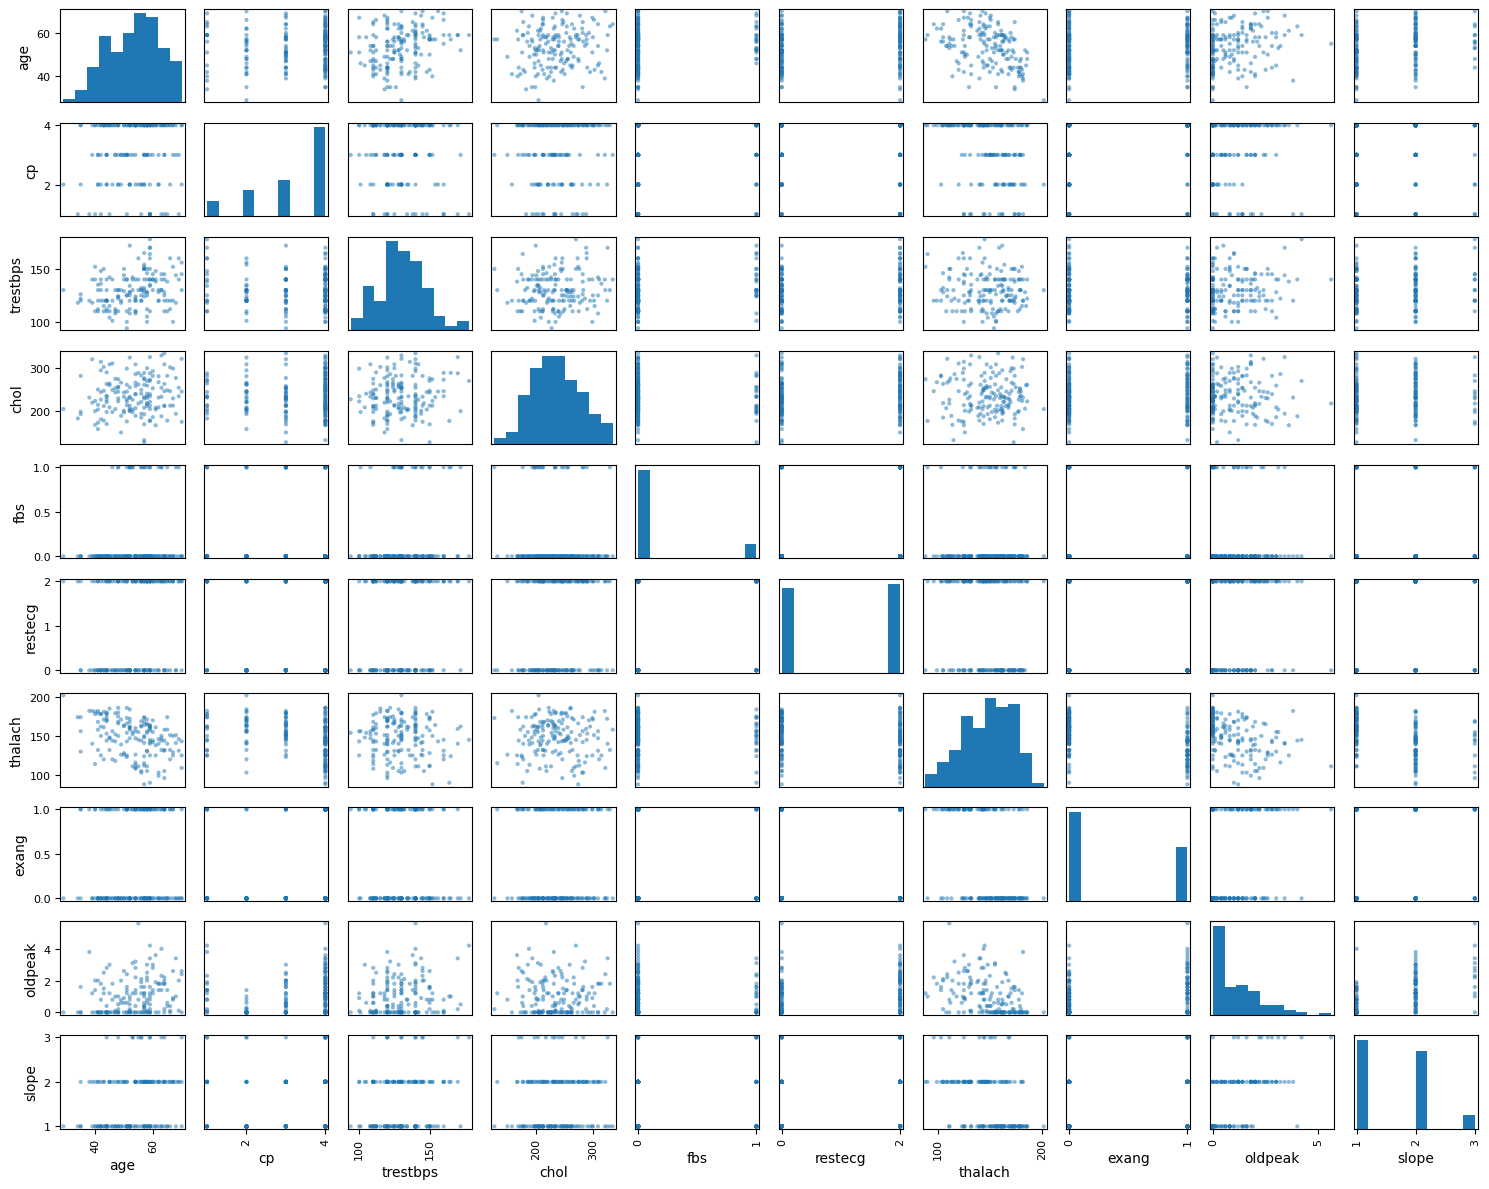

In [15]:
from pandas.plotting import scatter_matrix

scatter_matrix(X_train, figsize=(15, 12))
plt.tight_layout()
plt.show()

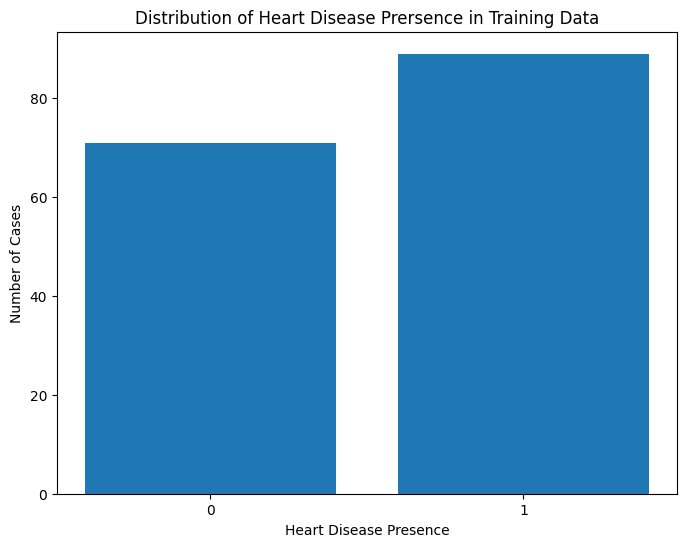

In [16]:
# Merge X_train and y_train into a single DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Rename the target column (y_train) if necessary for clarity
train_data.rename(columns={'num_binary': 'HeartDiseasePresence'}, inplace=True)

# Count the occurrences of each severity level
severity_counts = train_data['HeartDiseasePresence'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(severity_counts.index, severity_counts.values, tick_label=severity_counts.index)
plt.xlabel("Heart Disease Presence")
plt.ylabel("Number of Cases")
plt.title("Distribution of Heart Disease Prersence in Training Data")
plt.xticks(severity_counts.index)  # Ensure proper labeling of severity levels
plt.show()

In [17]:
# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

# Group by Heart Disease Severity and calculate summary statistics
distribution_summary = train_data.groupby('HeartDiseasePresence').describe()

# Display the distribution summary
print(distribution_summary)

# Reset display options to default after viewing
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

                        age                                                  \
                      count   mean   std    min    25%    50%    75%    max   
HeartDiseasePresence                                                          
0                    71.000 51.000 8.754 29.000 44.000 51.000 57.000 70.000   
1                    89.000 55.180 8.405 35.000 49.000 57.000 61.000 70.000   

                         cp                                            \
                      count  mean   std   min   25%   50%   75%   max   
HeartDiseasePresence                                                    
0                    71.000 2.718 0.988 1.000 2.000 3.000 3.500 4.000   
1                    89.000 3.562 0.878 1.000 4.000 4.000 4.000 4.000   

                     trestbps                                                 \
                        count    mean    std     min     25%     50%     75%   
HeartDiseasePresence                                                          

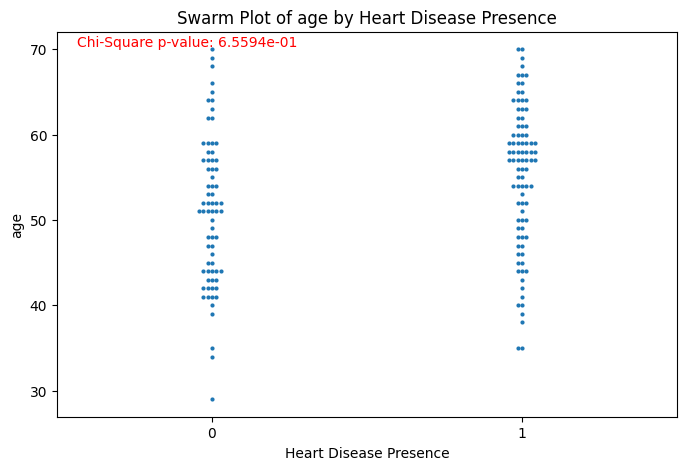

Chi-Square Test for age:
Chi2 Statistic: 31.1211, p-value: 6.5594e-01
----------------------------------------


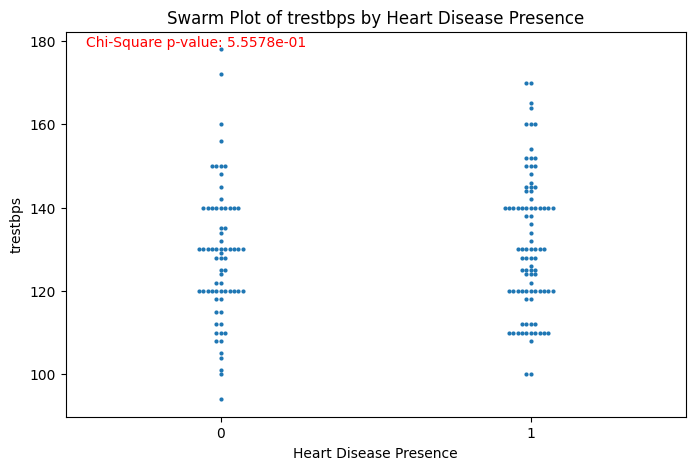

Chi-Square Test for trestbps:
Chi2 Statistic: 36.1381, p-value: 5.5578e-01
----------------------------------------


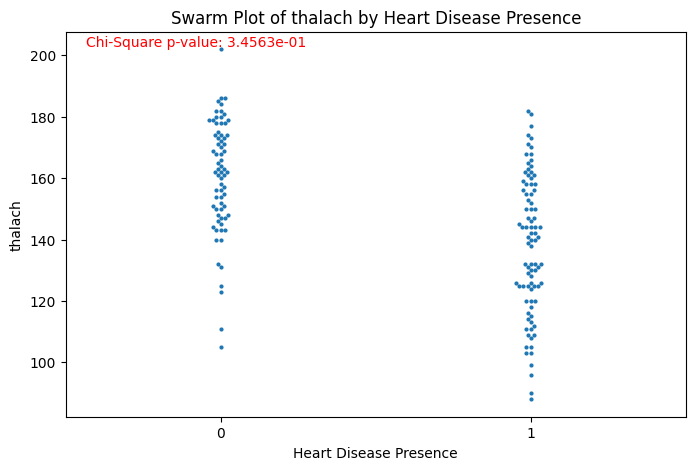

Chi-Square Test for thalach:
Chi2 Statistic: 74.1130, p-value: 3.4563e-01
----------------------------------------


In [18]:
from scipy.stats import chi2_contingency
import seaborn as sns

# List of columns to exclude
exclude_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'oldpeak','chol']

# Iterate only through columns not in exclude_columns
for column in [col for col in X_train.columns if col not in exclude_columns]:
    plt.figure(figsize=(8, 5))

    # Perform Chi-Square test
    contingency_table = pd.crosstab(train_data[column], train_data['HeartDiseasePresence'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Visualize the distribution using a swarm plot
    sns.swarmplot(data=train_data, x='HeartDiseasePresence', y=column, size=3)
    plt.title(f'Swarm Plot of {column} by Heart Disease Presence')
    plt.xlabel('Heart Disease Presence')
    plt.ylabel(column)

    # Add Chi-Square p-value to the plot
    plt.figtext(0.15, 0.85, f'Chi-Square p-value: {p:.4e}', fontsize=10, color='red')

    plt.show()

    # Print the test results in the console for reference
    print(f'Chi-Square Test for {column}:')
    print(f'Chi2 Statistic: {chi2:.4f}, p-value: {p:.4e}')
    print('-' * 40)

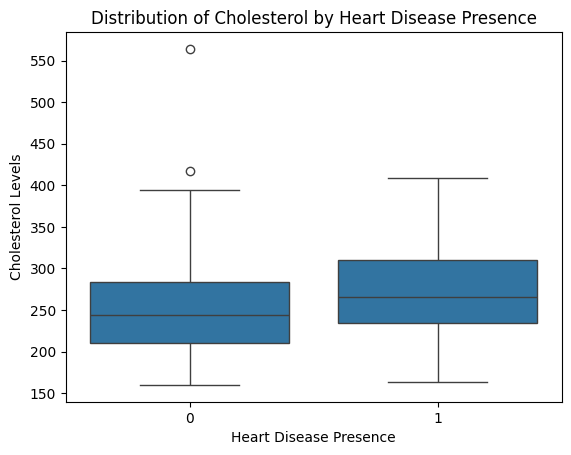

In [ ]:
sns.boxplot(data=train_data, x='HeartDiseasePresence', y='chol')
plt.title('Distribution of Cholesterol by Heart Disease Presence')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Cholesterol Levels')
plt.show()

In [19]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table for 'chol' and 'HeartDiseaseSeverity'
contingency_table = pd.crosstab(train_data['chol'], train_data['HeartDiseasePresence'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"p-value: {p:.4e}")

Chi-Square Test Results:
Chi2 Statistic: 118.6095
p-value: 1.5509e-01


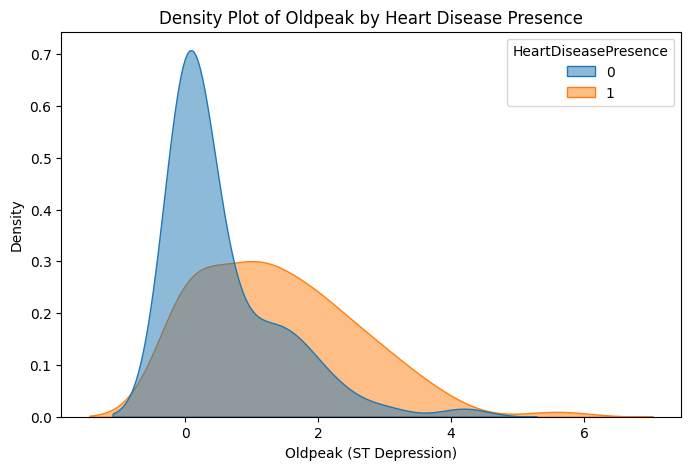

In [20]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=train_data, x='oldpeak', hue='HeartDiseasePresence', fill=True, common_norm=False, alpha=0.5)
plt.title('Density Plot of Oldpeak by Heart Disease Presence')
plt.xlabel('Oldpeak (ST Depression)')
plt.ylabel('Density')
plt.show()

In [22]:
# Create a contingency table for 'chol' and 'HeartDiseaseSeverity'
contingency_table = pd.crosstab(train_data['oldpeak'], train_data['HeartDiseasePresence'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"p-value: {p:.4e}")

Chi-Square Test Results:
Chi2 Statistic: 45.7332
p-value: 5.4855e-02


Chi-Square Test for cp:
Chi2 Statistic = 41.17171, p-value = 6.01e-09, Degrees of Freedom = 3
Significant association between cp and HeartDiseasePresence (p < 0.05).



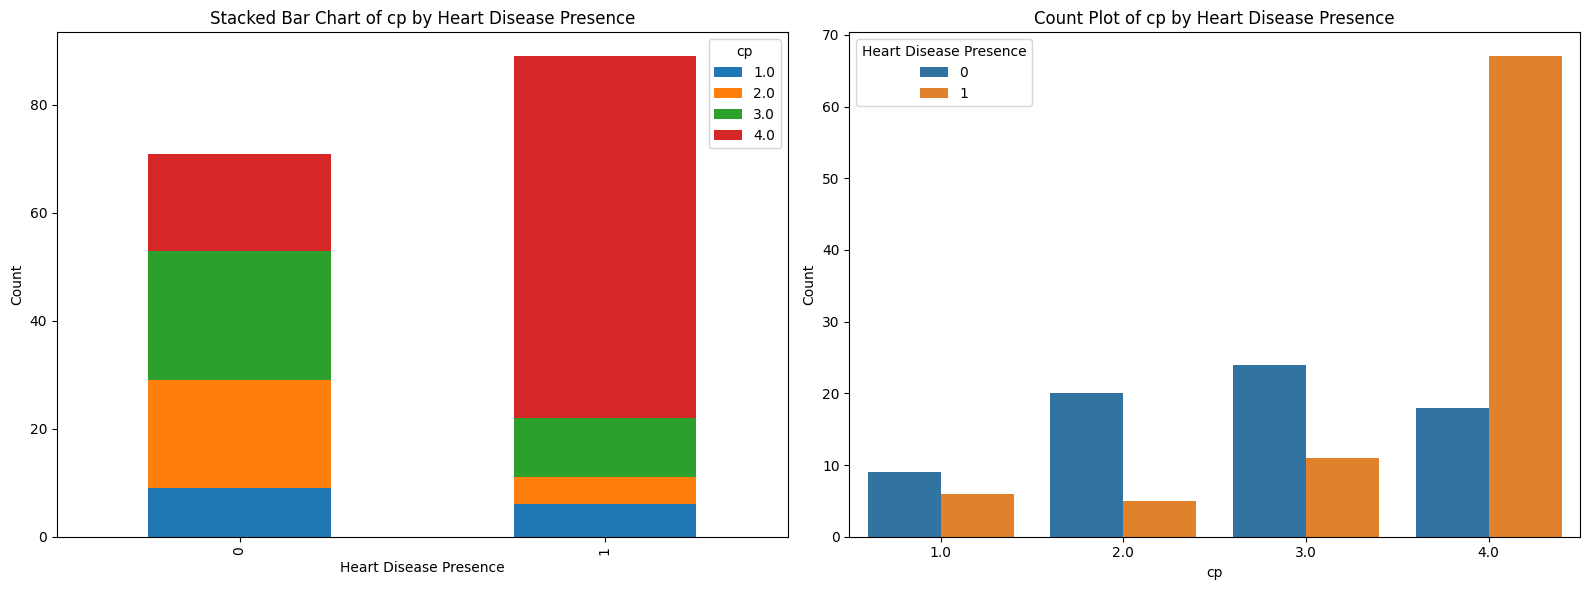

Chi-Square Test for fbs:
Chi2 Statistic = 1.59999, p-value = 2.06e-01, Degrees of Freedom = 1
No significant association between fbs and HeartDiseasePresence (p >= 0.05).



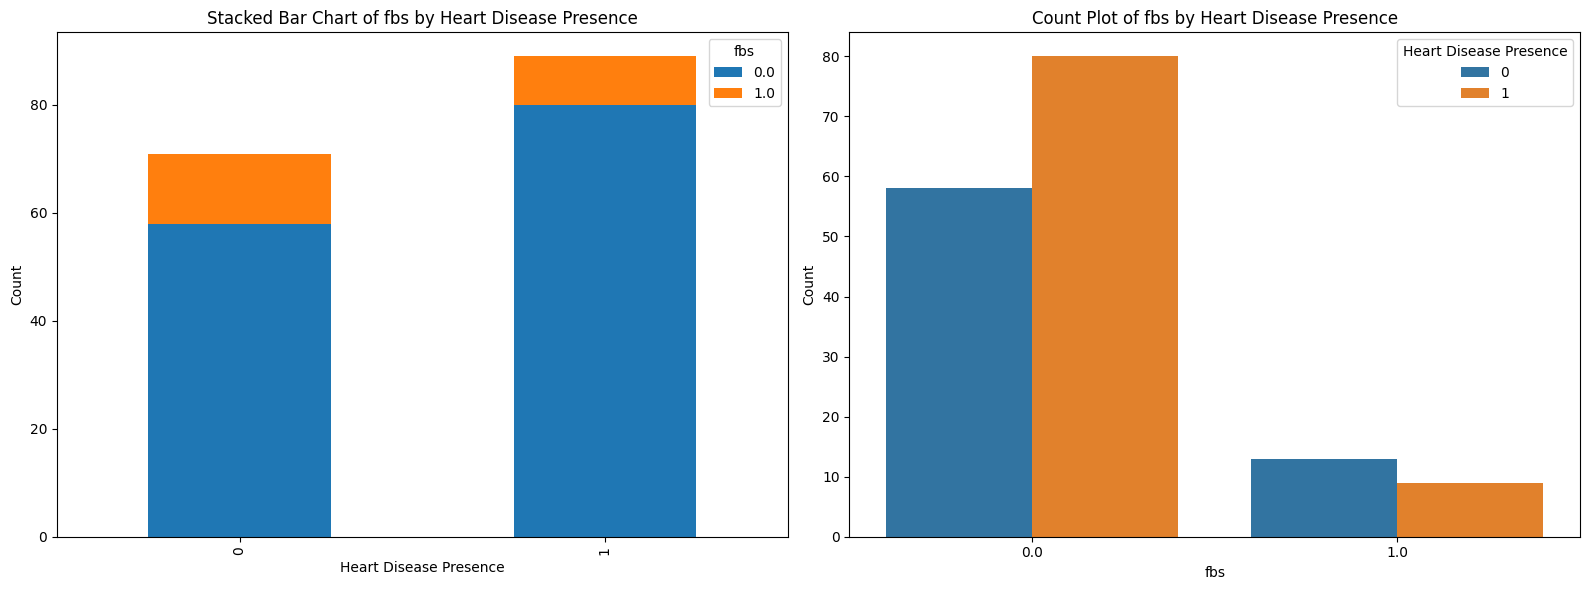

Chi-Square Test for restecg:
Chi2 Statistic = 8.00502, p-value = 4.66e-03, Degrees of Freedom = 1
Significant association between restecg and HeartDiseasePresence (p < 0.05).



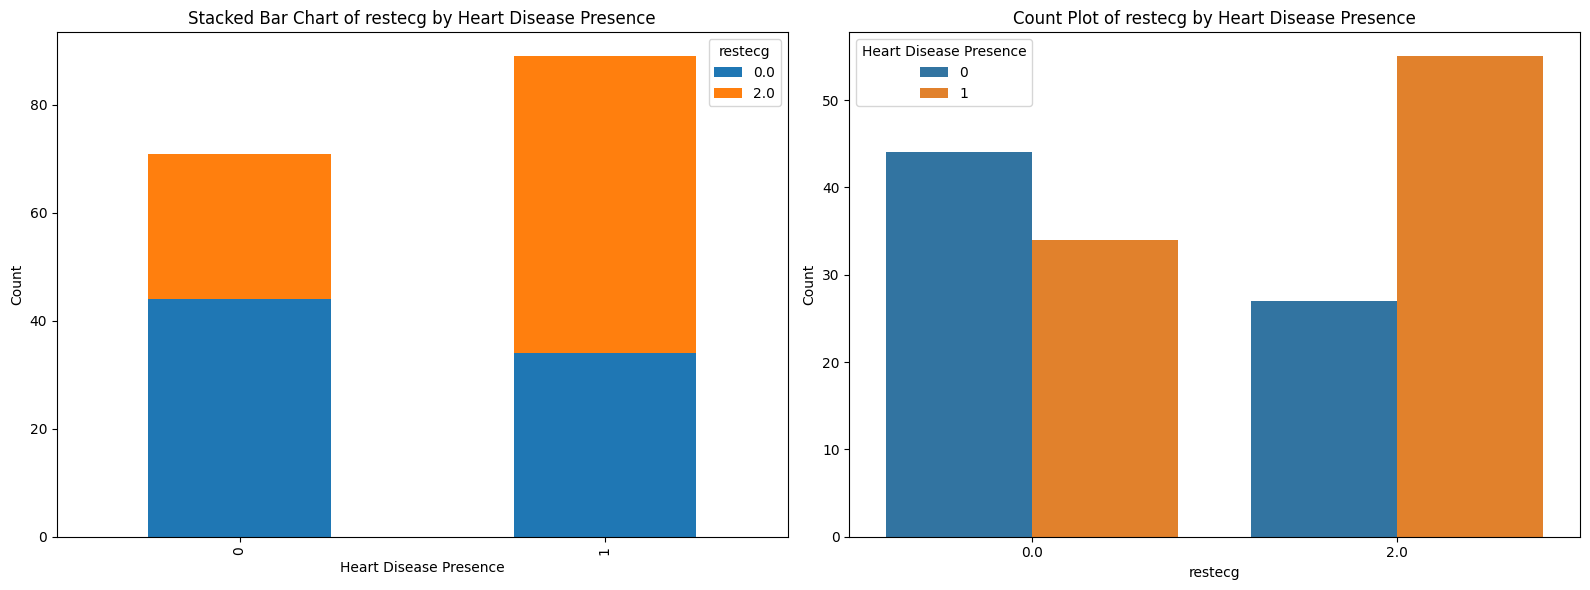

Chi-Square Test for exang:
Chi2 Statistic = 18.61054, p-value = 1.60e-05, Degrees of Freedom = 1
Significant association between exang and HeartDiseasePresence (p < 0.05).



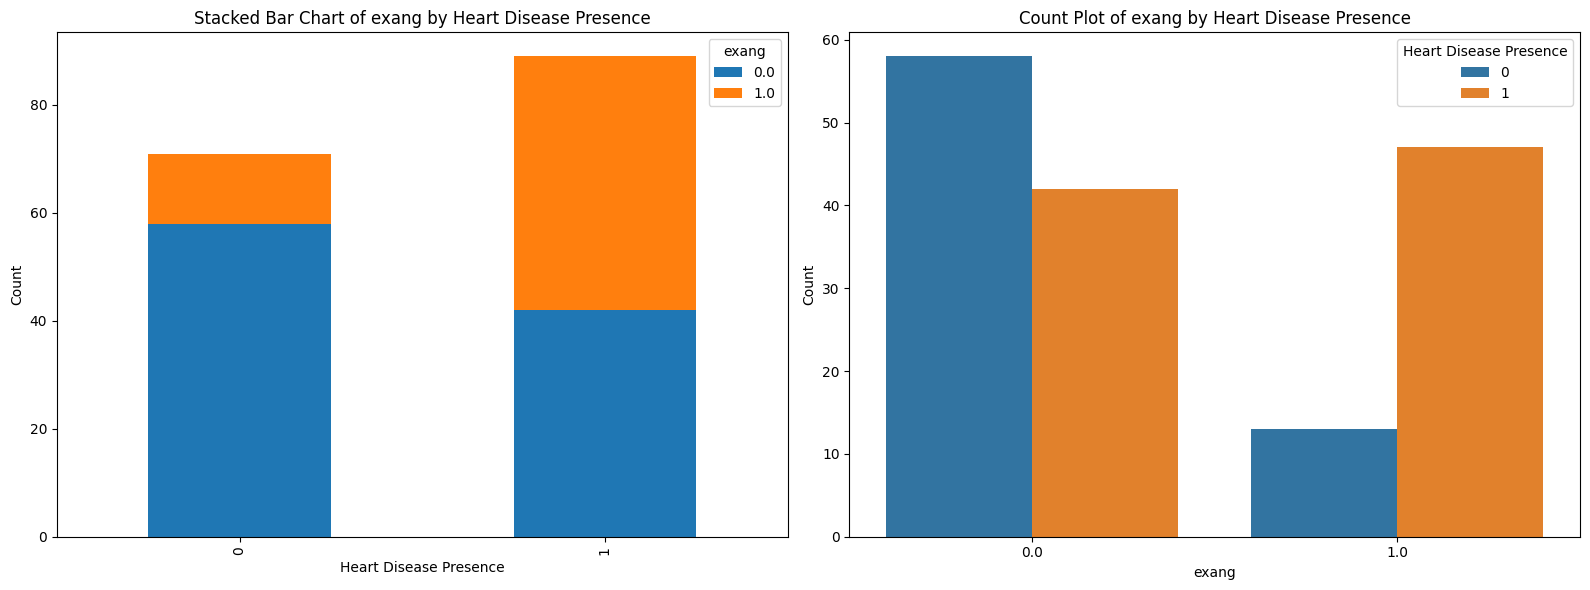

Chi-Square Test for slope:
Chi2 Statistic = 22.93450, p-value = 1.05e-05, Degrees of Freedom = 2
Significant association between slope and HeartDiseasePresence (p < 0.05).



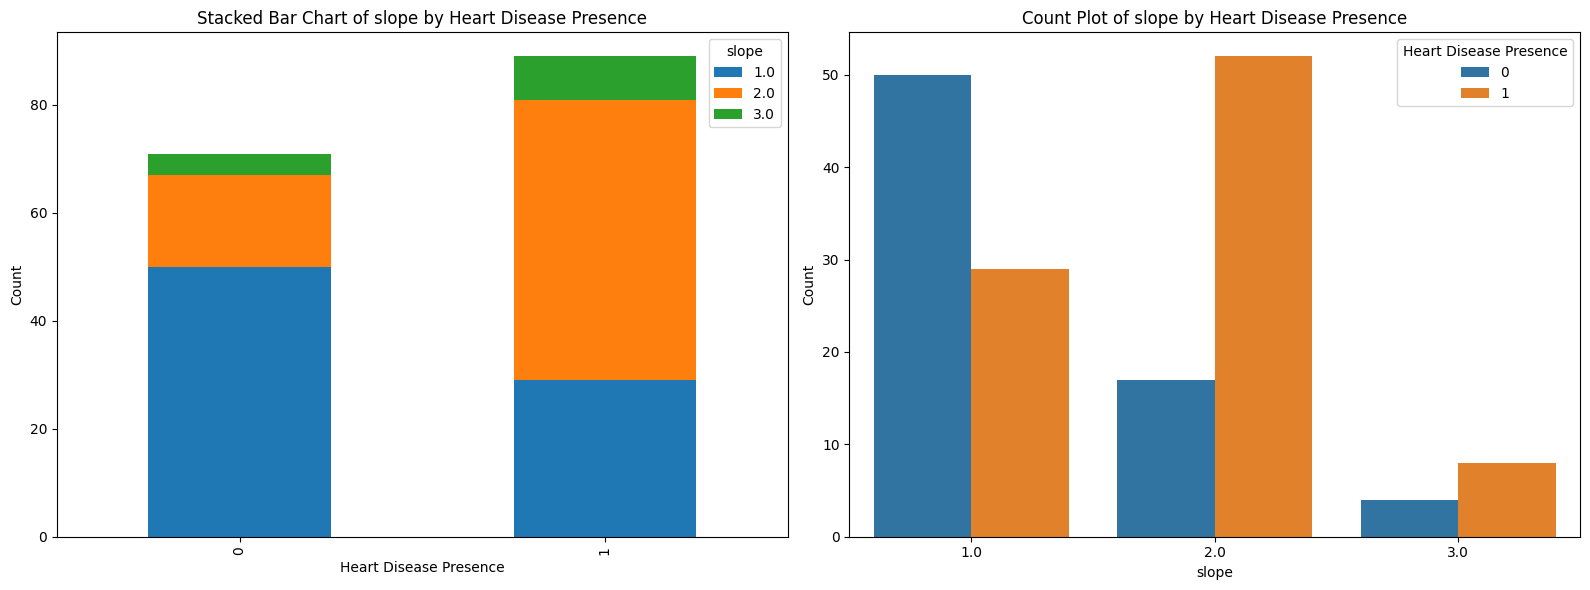

Chi-Square Test for ca:
Chi2 Statistic = 40.04588, p-value = 1.04e-08, Degrees of Freedom = 3
Significant association between ca and HeartDiseasePresence (p < 0.05).



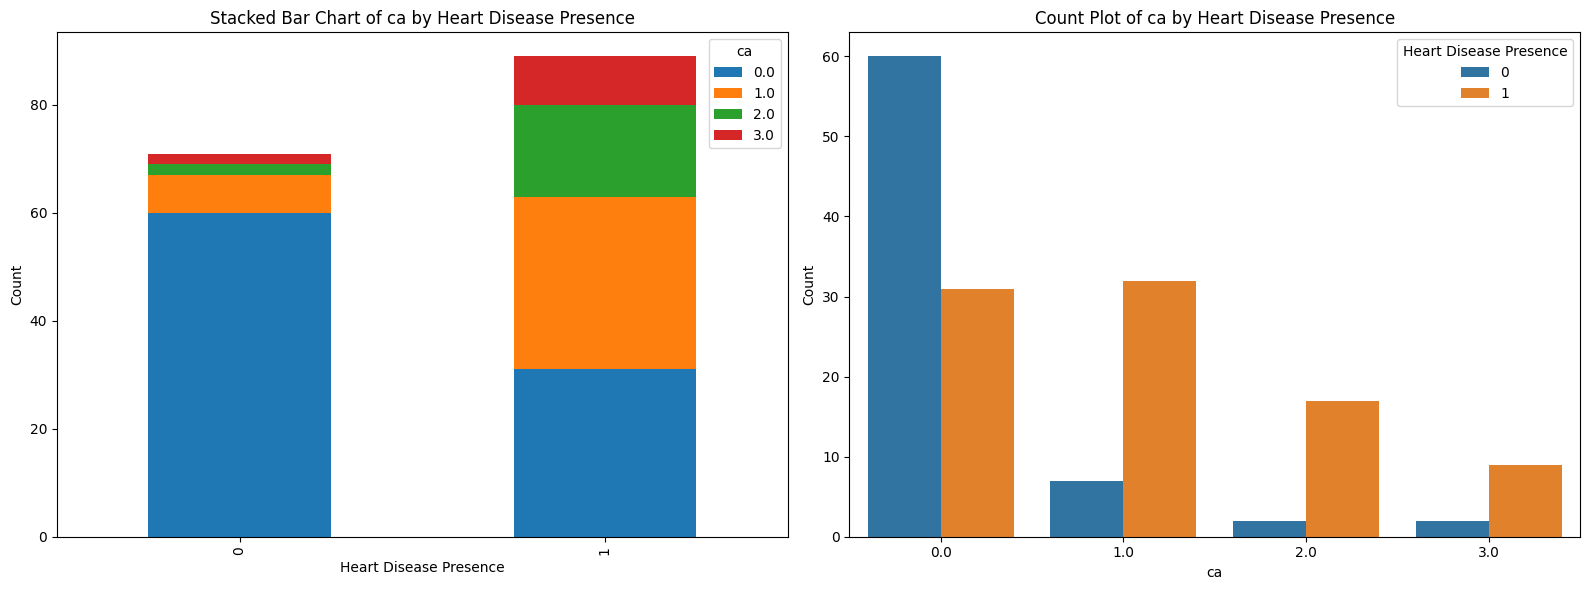

Chi-Square Test for thal:
Chi2 Statistic = 31.03328, p-value = 1.82e-07, Degrees of Freedom = 2
Significant association between thal and HeartDiseasePresence (p < 0.05).



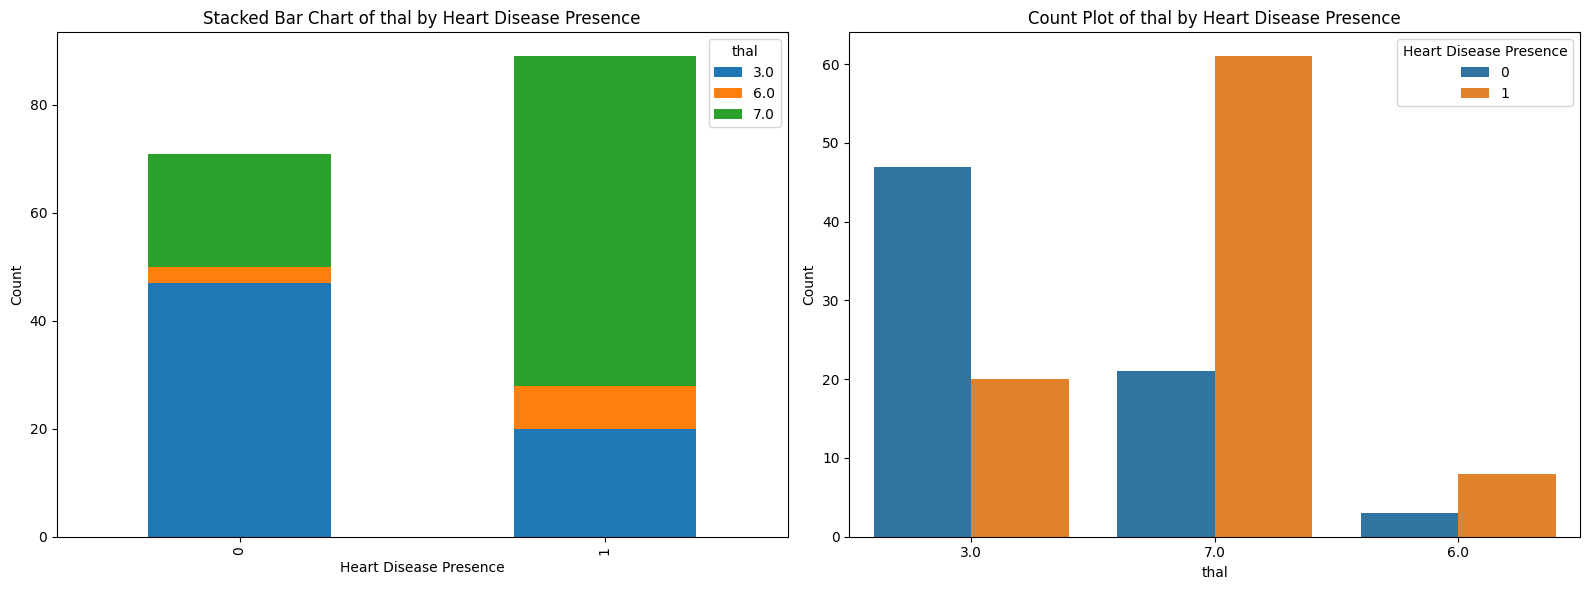

In [23]:
# Define the columns to analyze
columns = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']  # Replace with your actual column names
# Loop through each column to perform chi-square tests and display results
for column in columns:
    # Perform chi-square test
    contingency_table = pd.crosstab(train_data['HeartDiseasePresence'], train_data[column])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the chi-square test result with scientific notation for p-value
    print(f"Chi-Square Test for {column}:")
    print(f"Chi2 Statistic = {chi2:.5f}, p-value = {p:.2e}, Degrees of Freedom = {dof}")
    if p < 0.05:
        print(f"Significant association between {column} and HeartDiseasePresence (p < 0.05).\n")
    else:
        print(f"No significant association between {column} and HeartDiseasePresence (p >= 0.05).\n")


    # Create a figure with side-by-side subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Left plot: Stacked bar chart
    counts = train_data.groupby(['HeartDiseasePresence', column]).size().unstack(fill_value=0)
    counts.plot(kind='bar', stacked=True, ax=axes[0])
    axes[0].set_title(f'Stacked Bar Chart of {column} by Heart Disease Presence')
    axes[0].set_xlabel('Heart Disease Presence')
    axes[0].set_ylabel('Count')
    axes[0].legend(title=column)

    # Right plot: Countplot
    sns.countplot(data=train_data, x=column, hue='HeartDiseasePresence', ax=axes[1])
    axes[1].set_title(f'Count Plot of {column} by Heart Disease Presence')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Count')
    axes[1].legend(title='Heart Disease Presence')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

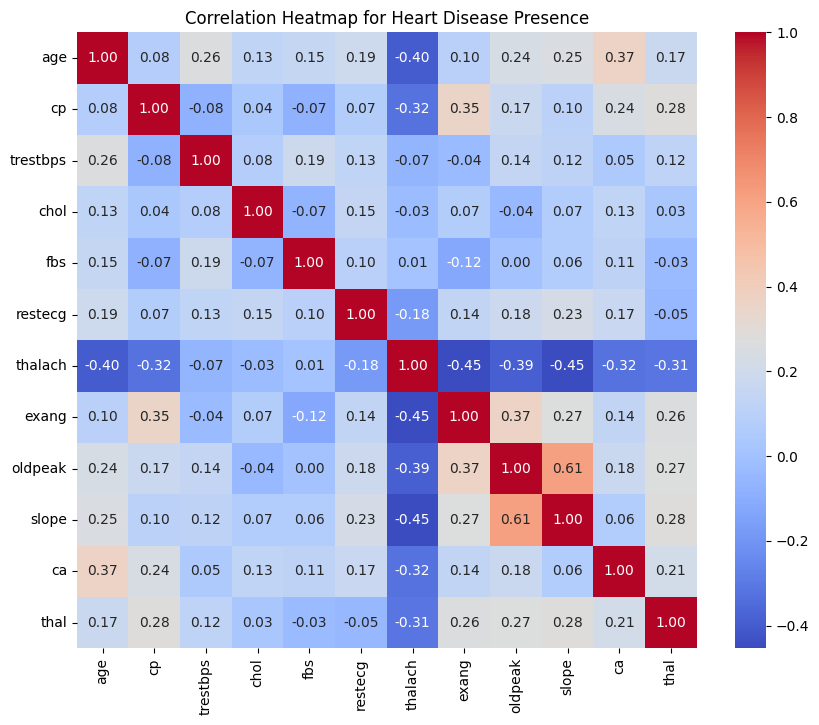

In [24]:
# Calculate and plot the correlation matrix for severity level 0
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Heart Disease Presence')
plt.show()